In [22]:
import pandas as pd
import numpy as np

### Importação dos dados - Base de licitações gerada no arquivo anterior

In [23]:
lic = pd.read_csv(r"C:\Users\efvs\Documents\Residencia Ednael\Repositórios\residencia2\Analises\lic2.csv")

In [24]:
lic

,Unnamed: 0,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,Município,Data Resultado Compra,Data Abertura,total,tipo,TAG
0,1,12020,154699,INST. ...,-99,Pregão...,234110...,Objeto...,Evento...,26000,Minist...,26432,Instit...,LONDRINA,22/01/...,14/12/...,41998.0...,OBRAS,0
1,103,52020,155821,INST.F...,-99,Pregão...,237902...,Objeto...,Evento...,26000,Minist...,26404,Instit...,SERRINHA,15/01/...,05/01/...,7969.80000,OBRAS,0
2,108,52020,160148,BASE D...,-99,Pregão...,652630...,Objeto...,Evento...,52000,Minist...,52121,Comand...,BRASILIA,15/01/...,11/01/...,53640.9...,OBRAS,0
3,109,52020,160199,HOSPIT...,-99,Pregão...,645830...,Objeto...,Evento...,52000,Minist...,52121,Comand...,RECIFE,25/01/...,13/10/...,13490.0...,OBRAS,0
4,128,62020,160082,PREFEI...,-99,Pregão...,644820...,Objeto...,Evento...,52000,Minist...,52121,Comand...,BRASILIA,13/01/...,05/01/...,803000....,OBRAS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,630,604322020,120628,BASE A...,7,Inexig...,672150...,Objeto...,Publicado,52000,Minist...,52111,Comand...,BELEM,28/01/...,NaN,100000....,COMPRA...,1
4010,631,604722020,120628,BASE A...,7,Inexig...,672150...,Objeto...,Publicado,52000,Minist...,52111,Comand...,BELEM,28/01/...,NaN,90000.0...,COMPRA...,1
4011,632,605222020,120628,BASE A...,7,Inexig...,672150...,Objeto...,Publicado,52000,Minist...,52111,Comand...,BELEM,28/01/...,NaN,200000....,COMPRA...,1
4012,633,605422020,120628,BASE A...,7,Inexig...,672150...,Objeto...,Publicado,52000,Minist...,52111,Comand...,BELEM,28/01/...,NaN,400000....,COMPRA...,1


In [25]:
pd.options.display.max_colwidth = 10

In [26]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [27]:
lic.groupby(['Modalidade Compra']).agg({'total':['mean','min','max','std']})

total                              
                 mean     min        max        std
Modalid...                                         
Dispens... 259632.... 0.00000 5722678... 2419357...
Inexigi... 1364805... 0.01000 3418717... 1420374...
Pregão     1556603... 0.00000 1170082... 6379831...
Pregão ... 436072.... 0.00000 1175381... 3913877...

In [28]:
lic.iloc[:,5].value_counts()

Dispensa de Licitação           1372
Pregão - Registro de Preço      1115
Pregão                           892
Inexigibilidade de Licitação     635
Name: Modalidade Compra, dtype: int64

In [29]:
# framework baseado em regras (alterável)
# yml = json melhorado (pyyml)

# Produzir ao fim uma TAG de suspeitos de desvio em licitações
# detecção de anomalias ao longo do tempo

# Modificar essa regra, para que seja baseada em algo já citado na literatura

def categorizeDispensa(x):
    #Inicialização das variáveis ------------------------------------
    classif=[] #Variável que salva a classificação da divisão
    div=[] #variável que salva o valor bruto da divisão pelos limites
    #
    teto_disp_o = 33000
    teto_RP_o = 3300000
    teto_Preg_o = 1
    teto_INEX_o = 1
    #
    teto_disp_c = 17600
    teto_RP_c = 1
    teto_Preg_c = 1
    teto_INEX_c = 1
    #----------------------------------------------------------------
    #Regras para licitações de obras
    if x.iloc[0,-2]=='OBRAS':

        '''if x.iloc[0,5]=='Dispensa de Licitação':
            div = teto_disp_o/x.iloc[0,-3]
            classif = ('O valor é {}% do teto'.format(div))'''
            
        if x.iloc[0,5]=='Pregão - Registro de Preço':
            div = x.iloc[0,-3]/teto_RP_o
            classif = ('O valor é {}% do teto ENTROU AQUI'.format(div))
            
        if x.iloc[0,5]=='Pregão':
            div = x.iloc[0,-3]/1
            classif = ('O valor é {}% do teto'.format(div))
            
        if x.iloc[0,5]=='Inexigibilidade de Licitação':
            div = x.iloc[0,-3]/1
            classif = ('O valor é {}% do teto'.format(div))
            
    #Regras para licitações de compras e serviços
    else:

        if x.iloc[0,5]=='Dispensa de Licitação':
            div = x.iloc[0,-3]/teto_disp_c
            classif = ('O valor é {}% do teto'.format(div))
            
        if x.iloc[0,5]=='Pregão - Registro de Preço':
            div = x.iloc[0,-3]/1
            classif = ('O valor é {}% do teto'.format(div))
            
        if x.iloc[0,5]=='Pregão':
            div = x.iloc[0,-3]/1
            classif = ('O valor é {}% do teto'.format(div))
            
        if x.iloc[0,5]=='Inexigibilidade de Licitação':
            div = x.iloc[0,-3]/1
            classif = ('O valor é {}% do teto'.format(div))
            
    return([div,classif])

# Teste de Modelos

- Categorização por diferença percentual do teto da classe

In [32]:
lic['div_piso'] = 0

In [33]:
#criar função disso, para jogar num framework só
for linha in range(len(lic['Modalidade Compra'])):
    if lic['TAG'][linha]==1:
        if (lic['Modalidade Compra'][linha] == 'Pregão - Registro de Preço'):
            lic['div_piso'][linha]=lic['total'][linha]/3300000
    else:
        lic['div_piso'][linha]='n_se_aplica'

C:\Users\efvs\AppData\Local\Temp/ipykernel_18204/2704201114.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lic['div_piso'][linha]='n_se_aplica'
C:\Users\efvs\miniconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [34]:
lic.head()

,Unnamed: 0,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,Município,Data Resultado Compra,Data Abertura,total,tipo,TAG,div_piso
0,1,12020,154699,INST. ...,-99,Pregão...,234110...,Objeto...,Evento...,26000,Minist...,26432,Instit...,LONDRINA,22/01/...,14/12/...,41998.0...,OBRAS,0,n_se_a...
1,103,52020,155821,INST.F...,-99,Pregão...,237902...,Objeto...,Evento...,26000,Minist...,26404,Instit...,SERRINHA,15/01/...,05/01/...,7969.80000,OBRAS,0,n_se_a...
2,108,52020,160148,BASE D...,-99,Pregão...,652630...,Objeto...,Evento...,52000,Minist...,52121,Comand...,BRASILIA,15/01/...,11/01/...,53640.9...,OBRAS,0,n_se_a...
3,109,52020,160199,HOSPIT...,-99,Pregão...,645830...,Objeto...,Evento...,52000,Minist...,52121,Comand...,RECIFE,25/01/...,13/10/...,13490.0...,OBRAS,0,n_se_a...
4,128,62020,160082,PREFEI...,-99,Pregão...,644820...,Objeto...,Evento...,52000,Minist...,52121,Comand...,BRASILIA,13/01/...,05/01/...,803000....,OBRAS,0,n_se_a...


### Testes com clusterização
- Divisão dos dados

In [35]:
#Ajuste da das datas pro formato correto
lic['Data Resultado Compra']=pd.to_datetime(lic['Data Resultado Compra'],format='%d/%m/%Y')

In [36]:
#Extração das datas
data=lic[lic['Modalidade Compra']!='Pregão - Registro de Preço']['Data Resultado Compra']

In [76]:
#Extração dos valores
X=lic[lic['Modalidade Compra']!='Pregão - Registro de Preço']['total']

In [92]:
#Normalização pelo valor máximo
X=X/max(X)
X=X.round(4)

In [94]:
X.reset_index(drop=True,inplace=True)

In [95]:
data.reset_index(drop=True,inplace=True)

In [66]:
data=np.array(data)
data=data.reshape(-1,1)

In [ ]:
serie_totais=pd.concat([X,data],axis=1)
serie_totais.reset_index(inplace=True)
serie_totais.set_index('Data Resultado Compra',inplace=True)
del(serie_totais['index'])

## KMEANS PARA TIMESERIES

In [53]:
!pip install tslearn

In [110]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10)

In [111]:
model.fit(serie_totais)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=4)

In [112]:
model.cluster_centers_

array([[[7.85002710e-04]],

       [[1.00000000e+00]],

       [[1.33792798e-01]],

       [[3.90417824e-02]]])

In [113]:
predictions = model.predict(serie_totais)
centers=model.cluster_centers_

C:\Users\efvs\miniconda3\envs\rsd\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2899 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [114]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

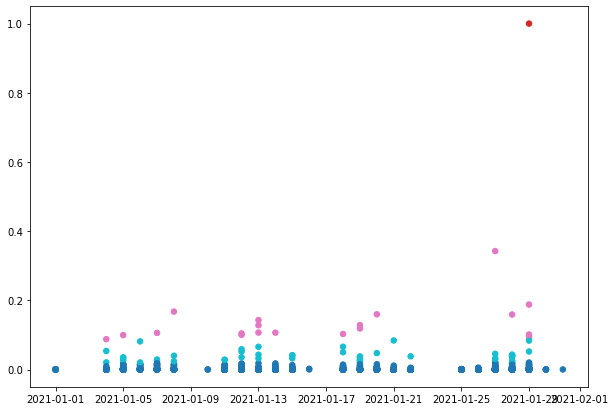

In [116]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(serie_totais.index,serie_totais.iloc[:,0],c=predictions, s=30, cmap='tab10')
#plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

## KMEANS NORMAL

In [158]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais)
kmeans.labels_
kmeans.fit(serie_totais)

KMeans(n_clusters=4, random_state=0)

In [159]:
predictions = kmeans.predict(serie_totais)
centers=kmeans.cluster_centers_

In [160]:
kmeans.cluster_centers_

array([[7.11594745e-04],
       [1.00000000e+00],
       [1.26853885e-01],
       [3.23094792e-02]])

(array([18628., 18632., 18636., 18640., 18644., 18648., 18652., 18656.,
        18659.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

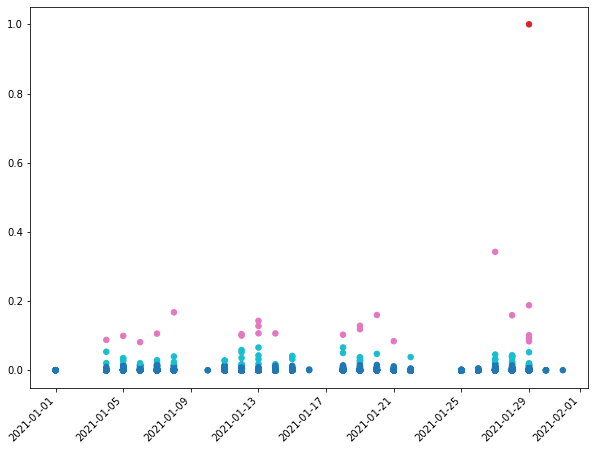

In [161]:
# avaliar a variação do cluster mes a mes
# Extrair as bordas de decisão
#como interpretar o Kmeans

from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(serie_totais.index,serie_totais.iloc[:,0],c=predictions, s=30, cmap='tab10')
plt.xticks(rotation=45,ha='right')
#plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [123]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [141]:
serie_totais.columns

Index(['total'], dtype='object')

In [142]:
labels=serie_totais.columns

In [202]:
import numpy as np
from sklearn.datasets import load_digits

serie_totais, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = serie_totais.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [203]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

bench_k_means(kmeans=model, name="k-meansTS", data=serie_totais, labels=labels)
################
kmeansMM = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeansMM, name="k-means++", data=serie_totais, labels=labels)

kmeansRANDOM = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=serie_totais, labels=labels)
################
bench_k_means(kmeans=kmeans, name="k-means", data=serie_totais, labels=labels)

pca = PCA(n_components=n_digits).fit(serie_totais)
kmeanspca = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeanspca, name="PCA-based", data=serie_totais, labels=labels)


print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-meansTS	55.696s	19	0.057	0.203	0.089	0.013	0.084	0.028
k-means++	0.107s	69662	0.680	0.719	0.699	0.570	0.695	0.170
random   	0.212s	89120	0.364	0.609	0.456	0.286	0.454	0.134
k-means  	0.208s	89120	0.364	0.609	0.456	0.286	0.454	0.124
PCA-based	0.034s	72686	0.636	0.658	0.647	0.521	0.643	0.148
__________________________________________________________________________________


### Tentar definir uma separação mais geral, que não dependa tanto da variação dos dados

In [184]:
serie_totais.iloc[:,0]

Data Resultado Compra
2021-01-29   0.00076
2021-01-07   0.00000
2021-01-28   0.00011
2021-01-29   0.00050
2021-01-27   0.00526
               ...  
2021-01-28   0.00029
2021-01-28   0.00026
2021-01-28   0.00059
2021-01-28   0.00117
2021-01-28   0.00029
Name: total, Length: 2899, dtype: float64

In [185]:
serie_totais.index

DatetimeIndex(['2021-01-29', '2021-01-07', '2021-01-28', '2021-01-29',
               '2021-01-27', '2021-01-29', '2021-01-15', '2021-01-27',
               '2021-01-20', '2021-01-29',
               ...
               '2021-01-26', '2021-01-26', '2021-01-28', '2021-01-28',
               '2021-01-28', '2021-01-28', '2021-01-28', '2021-01-28',
               '2021-01-28', '2021-01-28'],
              dtype='datetime64[ns]', name='Data Resultado Compra', length=2899, freq=None)

In [ ]:
lic['Modalidade Compra'].value_counts()

## APLICANDO PARA INEXIBILIDADE - LEGAIS

In [ ]:
inex_datas=lic[(lic['Modalidade Compra']=='Inexigibilidade de Licitação') & (lic['TAG']==1)]['Data Resultado Compra']
inex_totais=lic[(lic['Modalidade Compra']=='Inexigibilidade de Licitação') & (lic['TAG']==1)]['total']

In [ ]:
inex_totais=inex_totais/max(inex_totais)

In [ ]:
serie_totais_inex=pd.concat([inex_datas,inex_totais],axis=1)

In [ ]:
serie_totais_inex.set_index('Data Resultado Compra',inplace=True)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais_inex)
kmeans.labels_
kmeans.fit(serie_totais_inex)

predictions = kmeans.predict(serie_totais_inex)
centers=kmeans.cluster_centers_

kmeans.cluster_centers_

from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(serie_totais_inex.index,serie_totais_inex.iloc[:,0],c=predictions, s=30, cmap='tab10')
plt.xticks(rotation=45,ha='right')

## APLICANDO PARA PREGÃO - LEGAIS

In [ ]:
preg_datas=lic[(lic['Modalidade Compra']=='Pregão') & (lic['TAG']==1)]['Data Resultado Compra']
preg_totais=lic[(lic['Modalidade Compra']=='Pregão') & (lic['TAG']==1)]['total']

In [ ]:
preg_totais=preg_totais/max(inex_totais)

In [ ]:
serie_totais_preg=pd.concat([preg_datas,preg_totais],axis=1)

In [ ]:
serie_totais_preg.set_index('Data Resultado Compra',inplace=True)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(serie_totais_preg)
kmeans.labels_
kmeans.fit(serie_totais_preg)

predictions = kmeans.predict(serie_totais_preg)
centers=kmeans.cluster_centers_

kmeans.cluster_centers_

from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(serie_totais_preg.index,serie_totais_preg.iloc[:,0],c=predictions, s=30, cmap='tab10')
plt.xticks(rotation=45,ha='right')